In [15]:
import yaml
import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
planet_config = 'planet_config.yaml'

In [3]:
# Our convenience function (could be loaded rather than copied):
def load_config(filename):
    with open(filename, 'r') as f:
        my_config = yaml.safe_load(f.read())
        
    return my_config

In [4]:
planets = load_config(planet_config)

In [5]:
planets

{'Alpha': ['data/planet_000/lc_000.json',
  'data/planet_000/lc_001.json',
  'data/planet_000/lc_002.json'],
 'Beta': ['data/planet_001/lc_000.json',
  'data/planet_001/lc_001.json',
  'data/planet_001/lc_002.json',
  'data/planet_001/lc_003.json'],
 'Bob': ['data/planet_003/lc_000.json', 'data/planet_003/lc_001.json'],
 'Gamma': ['data/planet_002/lc_000.json',
  'data/planet_002/lc_001.json',
  'data/planet_002/lc_002.json']}

## What about Bob?

In [6]:
name = 'Bob'

In [7]:
planets[name]

['data/planet_003/lc_000.json', 'data/planet_003/lc_001.json']

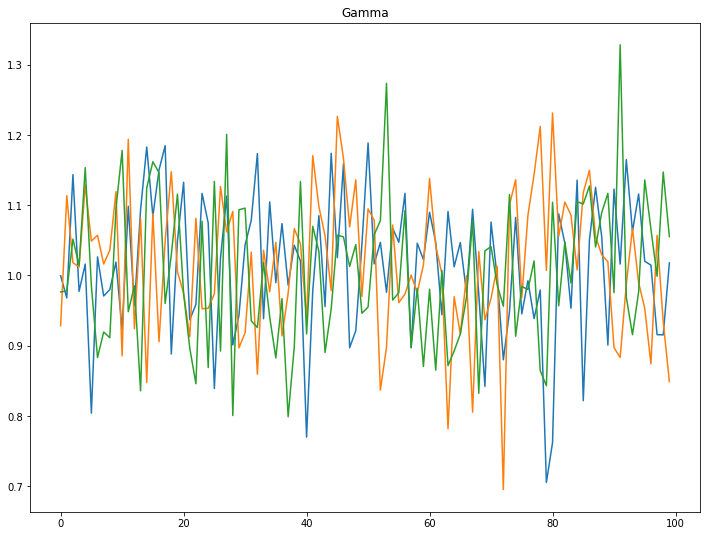

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 9)
for lc_json_file in planets[name]:
    # Load the json data
    with open(lc_json_file, 'r') as f:
        lc0 = json.loads(f.read())
        
    ax.plot(np.array(lc0))
    ax.set_title(name)

### All planets

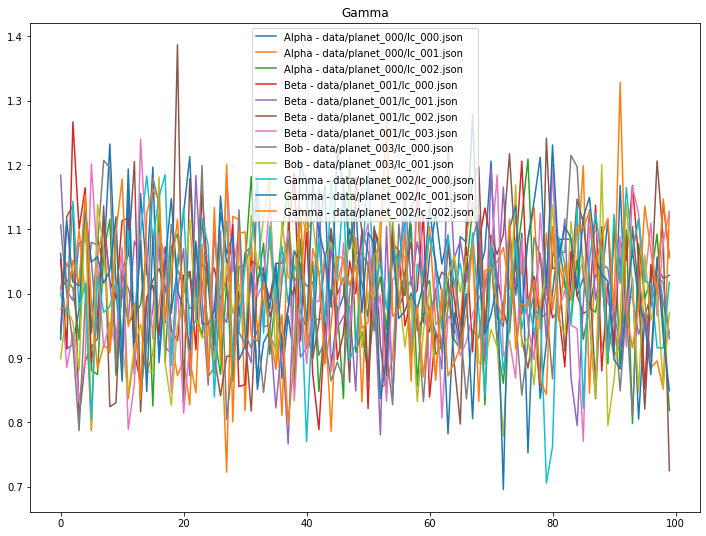

In [32]:
fig, ax = plt.subplots(1)
fig.set_size_inches(12, 9)

all_planets = list()

for name, files in planets.items():
    for lc_json_file in files:
        # Load the json data
        with open(lc_json_file, 'r') as f:
            lc0 = json.loads(f.read())

        # Create a Series
        planet_name = lc_json_file.split('/')[1]
        planet_series = pd.Series(lc0, name=f'{name}_{planet_name}')
        all_planets.append(planet_series)

        ax.plot(np.array(lc0), label=f'{name} - {lc_json_file}')
        ax.set_title(name)
        ax.legend()
        

In [78]:
# Give the planet a name and make sure it is a "category type"
df0.index.name = 'Planet'
df0.index = df0.index.astype('category')

In [79]:
df1 = df0.reset_index().melt(id_vars=['Planet'], var_name='timestamp', value_name='rel_flux')

In [80]:
# Look at the "wide" dataset.
df0

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Planet,,,,,,,,,,,,,,,,,,,,,
Alpha_planet_000,1.062184,0.914752,0.920232,0.975262,1.129284,0.938767,1.086197,1.044527,1.232477,1.012109,...,0.903336,1.168016,0.939562,1.023297,0.804804,0.967119,0.994750,1.042458,1.023444,1.028393
Alpha_planet_000,1.008262,1.047542,1.019667,1.098254,0.998014,0.786963,1.056208,1.108823,0.908194,1.013467,...,0.902489,0.920049,1.092816,1.069683,1.116290,0.989782,0.884386,0.895309,0.851483,1.126786
Alpha_planet_000,1.005893,1.021755,1.008086,0.927972,1.144181,0.880636,0.874313,1.064177,1.115311,0.873317,...,1.117620,0.882670,1.099263,0.797862,1.077329,0.992498,1.023042,1.092578,0.956685,0.818364
Beta_planet_001,1.053556,0.913689,1.266819,1.100489,1.164589,0.892274,0.965403,1.120593,1.019709,0.992525,...,0.924587,1.081408,1.051193,1.167888,1.054118,0.851461,1.045384,0.991880,1.140753,1.058528
Beta_planet_001,1.184136,1.004251,0.989287,1.078611,1.084436,1.050540,0.934107,1.112008,1.016934,0.931136,...,0.972648,0.916919,0.994116,0.994120,0.936563,0.966012,0.900384,1.053065,0.986045,0.937585
Beta_planet_001,0.939483,1.119725,1.136618,0.806353,0.894611,0.917093,0.930256,1.136315,0.824195,0.830101,...,1.089215,1.053193,0.933166,1.104071,1.001143,0.820457,0.999282,1.206215,1.084448,0.724769
Beta_planet_001,1.012046,0.885376,0.939555,0.832474,0.899078,1.201576,1.046704,0.916123,0.954616,0.915292,...,0.958010,1.088329,0.917505,1.165886,1.123698,1.017459,1.109650,0.964886,1.078744,1.127352
Bob_planet_003,1.106471,0.998812,0.921028,0.786826,0.986688,1.079806,1.075478,1.207089,1.195847,0.887107,...,0.970569,0.848641,0.977604,0.810045,1.029081,0.953344,0.979145,1.027264,1.017321,0.929421
Bob_planet_003,0.898757,0.976500,0.955669,0.880580,1.134556,0.791028,1.138286,1.068878,0.924376,1.084681,...,0.866790,0.965843,1.141402,1.010257,0.846899,1.060150,0.958713,1.001204,0.854863,0.971098


In [82]:
# Look at the "tidy" dataset.
df1

,Planet,timestamp,rel_flux
0,Alpha_planet_000,0,1.062184
1,Alpha_planet_000,0,1.008262
2,Alpha_planet_000,0,1.005893
3,Beta_planet_001,0,1.053556
4,Beta_planet_001,0,1.184136
...,...,...,...
1195,Bob_planet_003,99,0.929421
1196,Bob_planet_003,99,0.971098
1197,Gamma_planet_002,99,1.017837
1198,Gamma_planet_002,99,0.848980


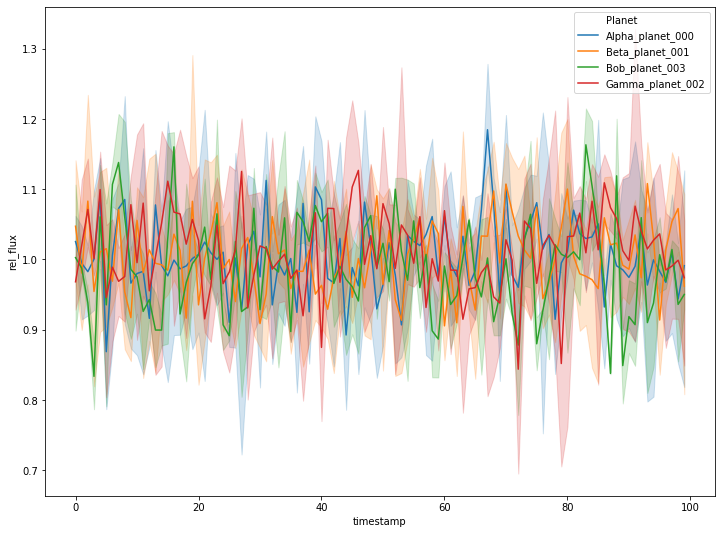

In [81]:
ax = sns.lineplot(x='timestamp', y='rel_flux', hue='Planet', data=df1)
ax.figure.set_size_inches(12, 9)